In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import sklearn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
TRAINING_DIR = "/content/drive/MyDrive/cut_data_limit10000/train"
VALIDATION_DIR = "/content/drive/MyDrive/cut_data_limit10000/validation/"
TEST_DIR = "/content/drive/MyDrive/cut_data_limit10000/test"

In [4]:
training_datagen = ImageDataGenerator(
                                        rescale=1. / 255, # 1로
                                        rotation_range=20, # 지정된 각도 범위내에서 임의로 원본이미지를 회전시킵니다.
                                        width_shift_range=0.1, # 지정된 수평방향 이동 범위내에서 임의로 원본이미지를 이동
                                        height_shift_range=0.1, # 지정된 수평방향 이동 범위내에서 임의로 원본이미지를 이동
                                        zoom_range=0.05, # 지정된 확대/축소 범위내에서 임의로 원본이미지를 확대/축소
                                        horizontal_flip=True, # 수평방향으로 뒤집기
                                        fill_mode='reflect', # 인풋 경계의 바깥 공간 채원짐 : 'reflect': abcddcba|abcd|dcbaabcd
                                        validation_split=0.2 # 부동소수점. (엄격히 0과 1사이의 값으로) 검증의 용도로 남겨둘 이미지의 비율
                                        )

In [10]:
training_generator = training_datagen.flow_from_directory(TRAINING_DIR, # /content/drive/MyDrive/cut_data_limit10000/test
                                                          batch_size=32, 
                                                          target_size=(224, 224), 
                                                          class_mode='binary', # binary : 1D 이진 라벨이 반환됩니다.
                                                          shuffle=True  # 섞음
                                                        #   subset='training',
                                                         ) #flow_from_directory : 이미지를 불러올 때 폴더명에 맞춰서 자동으로 labelling하는 함수

Found 0 images belonging to 2 classes.


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
test_datagen = ImageDataGenerator(
                    rescale = 1/255
                )

In [11]:
validation_generator = test_datagen.flow_from_directory(VALIDATION_DIR, 
                                                          batch_size=32, 
                                                          target_size=(224, 224), 
                                                          class_mode='binary'
                                                        #   subset='validation', 
                                                         )

Found 5757 images belonging to 2 classes.


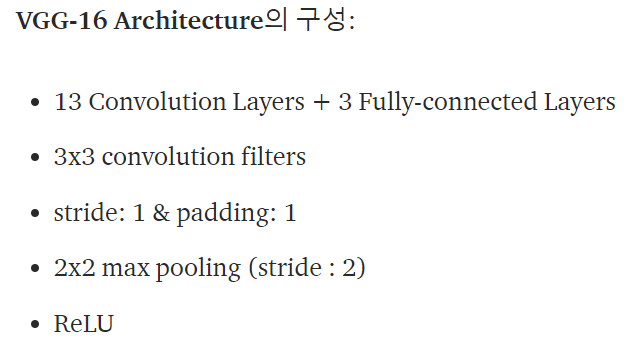

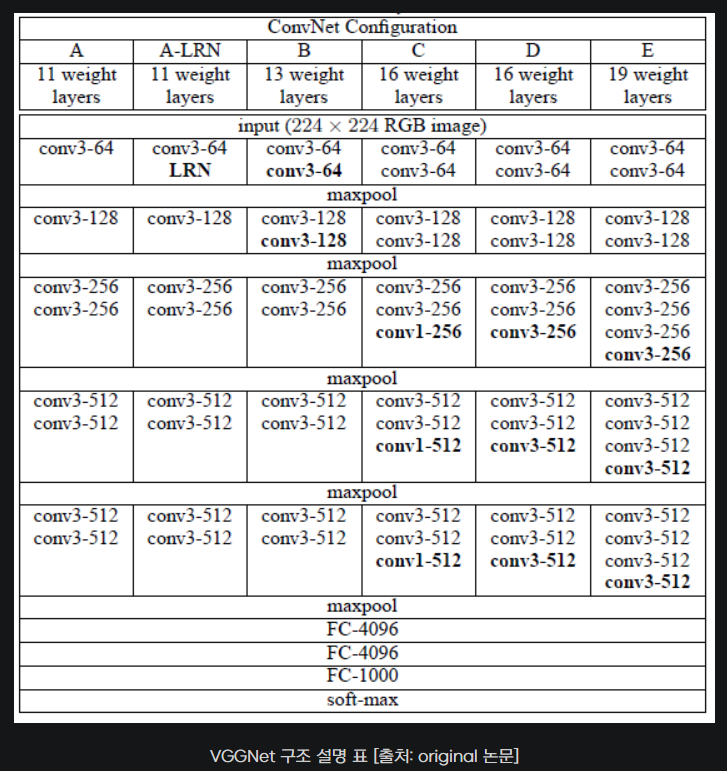

In [12]:
tf.keras.applications.VGG16(
    include_top=False, # 가장 상단의 fully connected계층들을 포함 시킬지의 여부
    weights=None, # imagenet
#    input_tensor=None,
    input_shape=(224,224,3), # 입력으로 받는 형태. 여기서는 224 by 224크기에 각 rgb채널 3의 shape입니다.
    pooling=None,
    classes=2, #
    classifier_activation="relu",
).summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(64,kernel_size=(3,3), input_shape=(224,224,3), activation='relu', padding='SAME'))
model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=2, padding='VALID'))
model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='SAME'))
model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=2, padding='VALID'))
model.add(Conv2D(256,kernel_size=(3,3), activation='relu', padding='SAME'))
model.add(Conv2D(256,kernel_size=(3,3), activation='relu', padding='SAME'))
model.add(Conv2D(256,kernel_size=(3,3), activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=2, padding='VALID'))
model.add(Conv2D(512,kernel_size=(3,3), activation='relu', padding='SAME'))
model.add(Conv2D(512,kernel_size=(3,3), activation='relu', padding='SAME'))
model.add(Conv2D(512,kernel_size=(3,3), activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=2, padding='VALID'))
model.add(Conv2D(512,kernel_size=(3,3), activation='relu', padding='SAME'))
model.add(Conv2D(512,kernel_size=(3,3), activation='relu', padding='SAME'))
model.add(Conv2D(512,kernel_size=(3,3), activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=2, padding='VALID'))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)
checkpoint_path = f"/content/drive/MyDrive/cut_data_limit10000/model/cut_data_tmp_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                            save_weights_only=True, 
                            save_best_only=True, 
                            monitor='val_loss', 
                            verbose=1)
epochs = 1
model.fit(training_generator,
          epochs=epochs,
          validation_data=validation_generator,
          callbacks=[checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


101/102 [============================>.] - ETA: 53s - loss: 0.7028 - binary_accuracy: 0.4980 

In [ ]:
model.load_weights(checkpoint_path)

In [ ]:
# CNN 모델 저장
model.save("/content/drive/MyDrive/VGG-16_train.h5")